
<img src="https://th.bing.com/th/id/OIP.UALyJPEFAcMOe4IIyDoQbwAAAA?w=192&h=174&c=7&r=0&o=5&dpr=1.5&pid=1.7"  alt="Unable to display picture, please check the network" style="height:90px;" align="right"/>

<!-- <img src=" https://phys100.xmu.edu.cn/2020images/gold100.png"  alt="Unable to display picture, please check the network" style="height:85px;" align="right"/> -->
<hr>
<font face="微软雅黑" size=2><p align="right">院选课 《 <i>机器学习</i> 》 第 四 次作业——翟家辉 (<i>19720212203881</i>) </p></font> 
<hr>

# 

<font face="华文行楷" size=8 ><div align='center'>正则化逻辑回归</div></font> 

    
 <font face="华文行楷" size=10 ><div align='center'>(Regularized Logistic Regression)</div></font> 




---------------------
________________________
<font size=6><div align='center'> **---------------------------目录---------------------------**</div></font>

$\quad$

<font size=5> **&#x2705; 壹 · 数据预处理——月牙形数据集**
    
$\quad$
    
<font size=5> **&#x2705; 贰 · 分类模型——梯度下降逻辑回归**

$\quad$
    
<font size=5> **&#x2705; 叁 · 模型优化——参数选取与泛化**



In [5]:
#常用库及命令

import numpy as np
    # 矩阵运算
import matplotlib.pyplot as plt
    # 绘图
import ipywidgets as widgets
    # 输入控件
import matplotlib.gridspec as gridspec
    # 自定义图形布局
import math
    # 数学运算
import scipy as sc
    # 科学运算及其他
import sympy as sy
    # 符号计算
from scipy.optimize import curve_fit
    # 函数拟合
from scipy.fft import fft,fftfreq
    # 快速FFT变换
# import numba as nb
    # CUDA加速
import time
    # 记录时间
from scipy.integrate import odeint
    # ODE求解
from scipy.integrate import solve_ivp
    # 变步长积分
import matplotlib.animation as animation
    # 动画
from joblib import Parallel, delayed
    # CPU并行加速
from tqdm import tqdm
    # 进度条显示
import pandas as pd
    # 数据读取
# import taichi  
import plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
# from collections import Counter
import seaborn as sns
    # 绘图
import sklearn
    # 机器学习
import copy
    # 复制
import matplotlib as mpl
# %matplotlib notebook
    # 绘图模式
plt.rcParams['font.sans-serif'] = ['SimHei']
    # 绘图显示中文
plt.rcParams['axes.unicode_minus'] = False
    # 绘图显示负号
    


<h1>文档细目<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#" data-toc-modified-id="-1"></a></span></li><li><span><a href="#" data-toc-modified-id="-2"></a></span></li><li><span><a href="#一-·-数据预处理——月牙形数据集" data-toc-modified-id="一-·-数据预处理——月牙形数据集-3">一 · 数据预处理——月牙形数据集</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#数据集信息" data-toc-modified-id="数据集信息-3.0.1">数据集信息</a></span></li><li><span><a href="#数据展示" data-toc-modified-id="数据展示-3.0.2">数据展示</a></span></li><li><span><a href="#数据集划分" data-toc-modified-id="数据集划分-3.0.3">数据集划分</a></span></li></ul></li></ul></li><li><span><a href="#二-·-分类模型——梯度下降逻辑回归" data-toc-modified-id="二-·-分类模型——梯度下降逻辑回归-4">二 · 分类模型——梯度下降逻辑回归</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#逻辑回归" data-toc-modified-id="逻辑回归-4.0.1">逻辑回归</a></span></li><li><span><a href="#交叉熵" data-toc-modified-id="交叉熵-4.0.2">交叉熵</a></span><ul class="toc-item"><li><span><a href="#不同学习率" data-toc-modified-id="不同学习率-4.0.2.1">不同学习率</a></span></li><li><span><a href="#不同分割比" data-toc-modified-id="不同分割比-4.0.2.2">不同分割比</a></span></li></ul></li><li><span><a href="#评估指标" data-toc-modified-id="评估指标-4.0.3">评估指标</a></span></li></ul></li></ul></li><li><span><a href="#三-·-模型优化——参数选取与泛化" data-toc-modified-id="三-·-模型优化——参数选取与泛化-5">三 · 模型优化——参数选取与泛化</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#引入高次幂" data-toc-modified-id="引入高次幂-5.0.1">引入高次幂</a></span></li><li><span><a href="#L2正则化" data-toc-modified-id="L2正则化-5.0.2">L2正则化</a></span></li><li><span><a href="#交叉验证" data-toc-modified-id="交叉验证-5.0.3">交叉验证</a></span></li><li><span><a href="#决策边界" data-toc-modified-id="决策边界-5.0.4">决策边界</a></span></li></ul></li></ul></li></ul></div>

<span style="color: green;">结论</span>$\qquad$
<span style="color: blue;">引用</span>$\qquad$
<span style="color: red;">问题</span>$\qquad$
<span style="color: yellow;">再出发！</span>

<!-- <div class="alert alert-success">成功！很好地完成了提交。</div>
<div class="alert alert-info">信息！请注意这个信息。</div>
<div class="alert alert-warning">警告！请不要提交。</div>
<div class="alert alert-danger">错误！请进行一些更改。</div> -->

# 

---------
--------
# 一 · 数据预处理——月牙形数据集

In [3]:
from sklearn.datasets import make_moons
data=make_moons(n_samples=400,noise=0.25,random_state=4)
Data = pd.DataFrame(data[0], columns=['X', 'Y'])
Data['Label'] = data[1]

### 数据集信息

In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       400 non-null    float64
 1   Y       400 non-null    float64
 2   Label   400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


 <div class="alert alert-success">该数据集具有 $X$ ，$Y$ 两个特征变量，以及分类结果 $Label$</div>

### 数据展示

In [6]:
g=sns.pairplot(Data, 
             diag_kind='kde', 
             kind="scatter",
            hue="Label",
             height=4.4)
g.map_lower(sns.kdeplot, levels=4, color=".2")
g.fig.suptitle("成对特征显示(散点+KDE)")

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

 <div class="alert alert-success">该数据集的两个特征变量 $X$ ，$Y$ 无线性相关，无需去除关联特征。且两特征变量的取值范围近似，可不进行预先标准化。</div>

### 数据集划分

In [5]:
from sklearn.model_selection import train_test_split

Y=Data['Label']
X=Data[['X',"Y"]]
# 以7:3比例分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

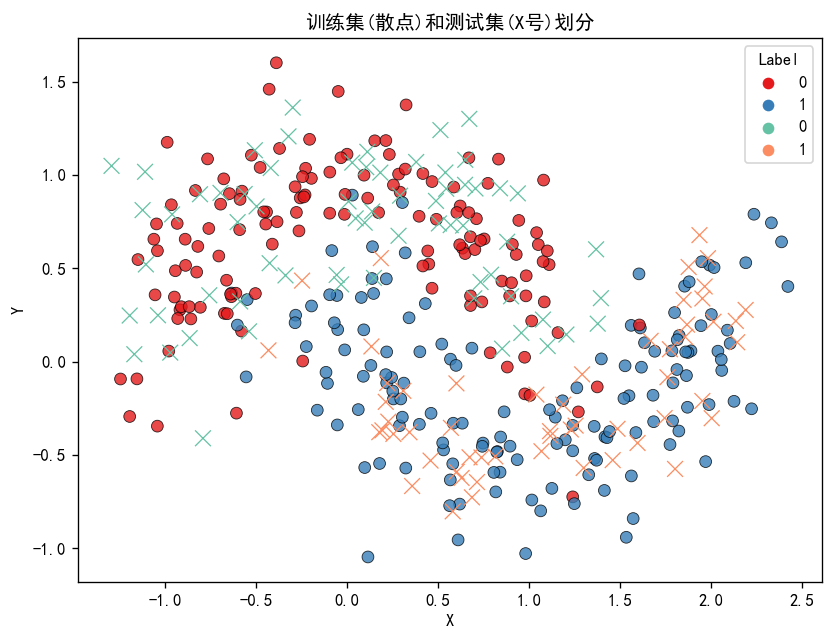

In [6]:
fig, ax = plt.subplots(figsize=(8, 6),dpi=120)
sns.scatterplot(x='X', y='Y', hue=y_train, data=X_train, ax=ax,marker='o', s=50, alpha=0.8, edgecolor='black', linewidth=0.5, palette='Set1')
sns.scatterplot(x='X', y='Y', hue=y_test, data=X_test, ax=ax,marker='x', s=90,palette='Set2')

ax.set_title("训练集(散点)和测试集(X号)划分")
plt.show()

---------
--------
# 二 · 分类模型——梯度下降逻辑回归

### 逻辑回归

逻辑回归（Logistic Regression）与线性回归（Linear Regression）都是一种广义线性模型（generalized linear model）。逻辑回归假设因变量 y 服从伯努利分布，而线性回归假设因变量 y 服从高斯分布。 因此与线性回归有很多相同之处。

在二分类问题之中，因变量y为类型划分指标，只取0、1两个值。阶跃函数虽然可以捕捉函数值从0到1的变化，但是函数本身并不光滑。可应用如下的假设函数：Sigmoid函数，也称为逻辑函数（Logistic function）来评估分类结果的可能性。

$$g(z)=\frac1{1+e^{-z}}$$

对于具有 $n$ 项特征的样本 $x$ ，其在参数 $\theta$ 下的分类结果为

$$h_\theta(x)=g(\theta_0+\theta_1x_1+\theta_2x_2+\theta_3x_3+\ldots+\theta_nx_n)=g(x^T\theta)$$

具有 $m$ 个样本，每个样本均有 $n$ 项特征的数据集 $X$ 的分类结果为

$$H_\Theta(X)=g(X\Theta)$$

In [7]:
# 假设函数
def h_theta(X,Theta):
    z=np.dot(X,Theta)
    return sigmod(z)

In [8]:
from sklearn.preprocessing import PolynomialFeatures

# X_Train为np.array,X_train为Pandas,其余类似。

X_Train=np.array(X_train).astype(float)
y_Train=np.array(y_train).astype(float).reshape(len(y_train),1)
X_Test=np.array(X_test).astype(float)
y_Test=np.array(y_test).astype(float).reshape(len(y_test),1)


poly = PolynomialFeatures(degree=10,include_bias=False)
X_poly = poly.fit_transform(X_Train)
Theta = np.random.rand(X_Train.shape[1],1)


In [6]:
sigmod(-0.01)

0.49750002083312506

In [1]:
def sigmod(x):
    return 1 / (1 + np.exp(-x))

plt.subplots(figsize=(8, 3),dpi=120)
x = np.linspace(-10, 10, 100)
y = sigmod(x)
plt.plot(x,y)

# plt.scatter(np.dot(X_Train,Theta),h_theta(X_Train,Theta),marker="o",facecolors='None', edgecolors='black',s=8)
theta=[6,-2]
plt.scatter(np.dot(X_Train,theta),y_Train,marker="o",facecolors='None', edgecolors='black',s=8)
# plt.scatter()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Logistic Function')
plt.show()

NameError: name 'plt' is not defined

### 交叉熵

在执行梯度下降的过程中需要指定一特定的损失函数，用于判定梯度下降的参数迭代方向

$$J=-\frac1m[\sum_{i=1}^m(y^i\log h_\theta(x^i)+(1-y^i)\log(1-h_\theta(x^i)))]$$

当预测指标 $h_\theta(x^i)$ 与实际指标 $y^i$ 完全相同时，损失函数 $J$ 降为0。

对于任意一个参数 $\theta_j$ ，在学习率设定为 $\alpha$ 的迭代公式为

$$\begin{aligned}\theta_j:=\theta_j-\frac{\alpha}{m}\sum_{i=1}^m(h_\theta(x^i)-y^i)x_j^i\end{aligned}$$

数据集 $X$ 的交叉熵函数可写为

$$\begin{aligned}J&=-\frac1m[Y^T\log(g(X\Theta))+(1-Y)^T\log(1-g(X\Theta))]\end{aligned}$$

学习率设定为 $\alpha$ 的迭代公式为

$$\begin{aligned}\Theta&:=\Theta-\frac{\alpha}{m}X^T(g(X\Theta)-Y)\end{aligned}$$

In [10]:
# 损失函数
def J_function(X,Y,Theta):
    J1=np.dot(Y.T,np.log(sigmod(np.dot(X,Theta))))
    J2=np.dot((1-Y).T,np.log(1-sigmod(np.dot(X,Theta))))
    return -(J1+J2)/len(Y)

In [11]:
# 梯度下降，输出参数变化序列

def Gradient_Lg(X_Train,X_Test,y_Train,y_Test,Theta,alpha,step):
    
    theta_grad=copy.deepcopy(Theta)

    Theta_list=np.zeros((len(Theta),step+1))
    Theta_list[:,0]=theta_grad[:,0]
    for i in range(step):
        #梯度下降
        theta_grad=theta_grad-alpha/len(y_Train)*np.dot(X_Train.T,(sigmod(np.dot(X_Train,theta_grad))-y_Train)) 
        Theta_list[:,i+1]=theta_grad[:,0]
    return Theta_list

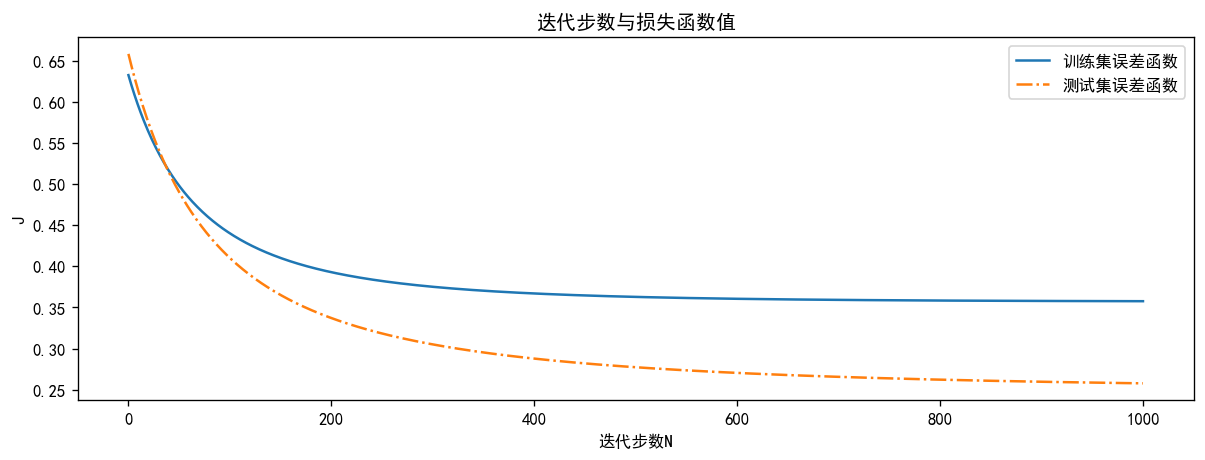

In [12]:
# 迭代步数与损失函数值
Theta = np.random.rand(X_Train.shape[1],1)
alpha =0.1
step=1000

step_list=np.arange(step+1)
Theta_grad=Gradient_Lg(X_Train,X_Test,y_Train,y_Test,Theta,alpha,step)

J_train=J_function(X_Train,y_Train,Theta_grad)[0]
J_test=J_function(X_Test,y_Test,Theta_grad)[0]
plt.subplots(figsize=(12, 4),dpi=120)
plt.plot(step_list,J_train,label='训练集误差函数')
plt.plot(step_list,J_test,"-.",label='测试集误差函数')
plt.legend()
plt.title("迭代步数与损失函数值")
plt.xlabel("迭代步数N")
plt.ylabel("J")
plt.show()

#### 不同学习率

Text(0, 0.5, 'J')

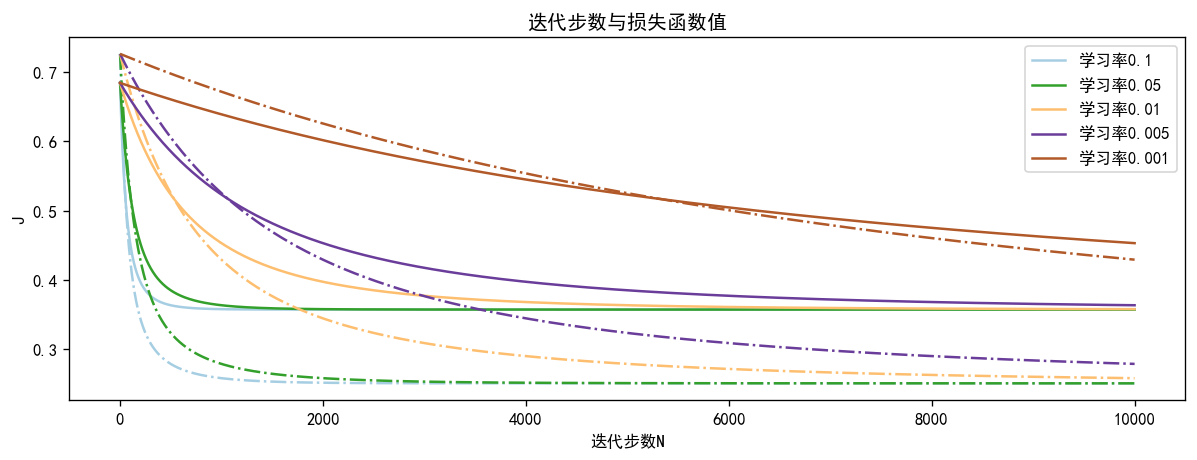

In [13]:
# 不同学习率
import matplotlib.cm as cm

Theta = np.random.rand(X_Train.shape[1],1)
step=10000
plt.subplots(figsize=(12, 4),dpi=120)
cmap = cm.get_cmap('Paired')
a=[0.1,0.05,0.01,0.005,0.001]
position = np.linspace(0,1,len(a))
step_list=np.arange(step+1)


for i in range(len(a)):
    alpha=a[i]
    color = cmap(position[i])

    Theta_grad=Gradient_Lg(X_Train,X_Test,y_Train,y_Test,Theta,alpha,step)

    J_train=J_function(X_Train,y_Train,Theta_grad)[0]
    J_test=J_function(X_Test,y_Test,Theta_grad)[0]

    plt.plot(step_list,J_train,c=color,label=f"学习率{round(alpha,3)}")
    plt.plot(step_list,J_test,"-.",c=color)
    
plt.legend()
plt.title("迭代步数与损失函数值")
plt.xlabel("迭代步数N")
plt.ylabel("J")

 <div class="alert alert-info">观察不同学习率下的梯度下降结果，只用损失函数进行判据，模型训练集损失函数值常高于测试集损失函数值，下面比较不同分割的迭代结果</div>

#### 不同分割比

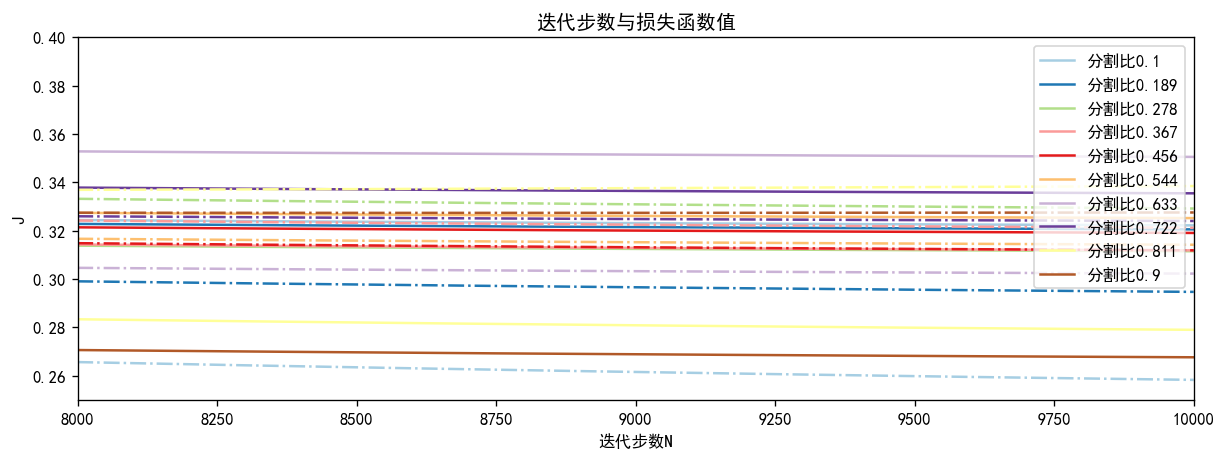

In [14]:
step=10000
data=make_moons(n_samples=400,noise=0.25,random_state=8)
X=data[0]
X=np.insert(X,0,values=1,axis=1)
Y=data[1]
plt.subplots(figsize=(12, 4),dpi=120)
cmap = cm.get_cmap('Paired')
a=np.linspace(0.1,0.9,10)
position = np.linspace(0,1,len(a))
step_list=np.arange(step+1)
Theta = np.random.rand(X.shape[1],1)



for i in range(len(a)):
    color = cmap(position[i])
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=a[i], random_state=745)
    X_Train=np.array(X_train).astype(float)
    y_Train=np.array(y_train).astype(float).reshape(len(y_train),1)
    X_Test=np.array(X_test).astype(float)
    y_Test=np.array(y_test).astype(float).reshape(len(y_test),1)
    Theta_grad=Gradient_Lg(X_Train,X_Test,y_Train,y_Test,Theta,0.01,step)
    J_train=J_function(X_Train,y_Train,Theta_grad)[0]
    J_test=J_function(X_Test,y_Test,Theta_grad)[0]

    plt.plot(step_list,J_train,c=color,label=f"分割比{round(a[i],3)}")
    plt.plot(step_list,J_test,"-.",c=color)
    
plt.legend()
plt.title("迭代步数与损失函数值")
plt.xlabel("迭代步数N")
plt.xlim(8000,10000)
plt.ylim(0.25,0.4)
plt.ylabel("J")
plt.show()

 <div class="alert alert-info">分割比也会对模型分类效果造成影响，整体而言该损失函数并不能很好的反映整个分类的成效，所以应该引入离散化指标来判断</div>

### 评估指标

In [15]:
# 分类精度
def Res(X,y,Theta):
    X_num=h_theta(X,Theta)
    X_num[X_num > 0.5] = 1
    X_num[X_num <= 0.5] = 0
    return np.sum(X_num != y.reshape(len(y)))/len(y)

In [16]:
# 梯度下降，输出参数变化序列

def Gradient_Lg_R(X_Train,X_Test,y_Train,y_Test,Theta,alpha,step):
    
    theta_grad=copy.deepcopy(Theta)
    R_train=[Res(X_Train,y_Train,theta_grad[:,-1])]
    R_test=[Res(X_Test,y_Test,theta_grad[:,-1])]
    Theta_list=np.zeros((len(Theta),step+1))
    Theta_list[:,0]=theta_grad[:,0]
    for i in range(step):
        #梯度下降
        theta_grad=theta_grad-alpha/len(y_Train)*np.dot(X_Train.T,(sigmod(np.dot(X_Train,theta_grad))-y_Train)) 
        Theta_list[:,i+1]=theta_grad[:,0]
        R_train.append(Res(X_Train,y_Train,theta_grad[:,-1]))
        R_test.append(Res(X_Test,y_Test,theta_grad[:,-1]))
    return Theta_list,R_train,R_test

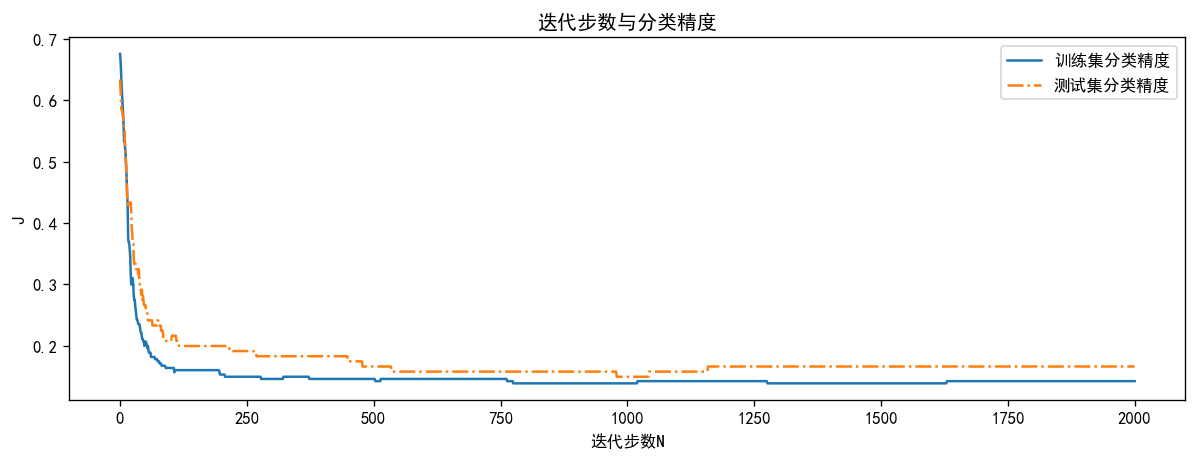

训练集分类精度：
0.1392857142857143
测试集分类精度：
0.15


In [17]:
# 迭代步数与损失函数值

alpha =0.1
step=2000

data=make_moons(n_samples=400,noise=0.25,random_state=52)
X=data[0]
X=np.insert(X,0,values=1,axis=1)
Y=data[1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=5)
X_Train=np.array(X_train).astype(float)
y_Train=np.array(y_train).astype(float).reshape(len(y_train),1)
X_Test=np.array(X_test).astype(float)
y_Test=np.array(y_test).astype(float).reshape(len(y_test),1)
step_list=np.arange(step+1)
Theta = np.random.rand(X_Train.shape[1],1)

Theta_grad,R_train,R_test=Gradient_Lg_R(X_Train,X_Test,y_Train,y_Test,Theta,alpha,step)
plt.subplots(figsize=(12, 4),dpi=120)
plt.plot(step_list,R_train,label='训练集分类精度')
plt.plot(step_list,R_test,"-.",label='测试集分类精度')
plt.legend()
plt.title("迭代步数与分类精度")
plt.xlabel("迭代步数N")
plt.ylabel("J")
plt.show()
print("训练集分类精度：")
print(min(R_train))
print("测试集分类精度：")
print(min(R_test))

 <div class="alert alert-success">修改评估指标为分类误差之后，模型分类结果训练集优于测试集，符合理论期待</div>

---------
--------
# 三 · 模型优化——参数选取与泛化

### 引入高次幂

In [115]:
data=make_moons(n_samples=400,noise=0.25,random_state=7)
X=data[0]
Y=data[1]

In [116]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=7,include_bias=False)
X_poly = poly.fit_transform(X)
X_poly=np.insert(X_poly,0,values=1,axis=1)
print("X引入七次幂后的特征数",len(X_poly[0]))

X引入七次幂后的特征数 36


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.3, random_state=8)
X_Train=np.array(X_train).astype(float)
y_Train=np.array(y_train).astype(float).reshape(len(y_train),1)
X_Test=np.array(X_test).astype(float)
y_Test=np.array(y_test).astype(float).reshape(len(y_test),1)

### L2正则化

加入L2正则项之后的损失函数：

$$\begin{aligned}J(\theta)=\frac{1}{m}\sum_{i=1}^{m}\left[-y^{(i)}\log(h_\theta(x^{(i)}))-(1-y^{(i)})\log(1-h_\theta(x^{(i)}))\right]+\frac{\lambda}{2m}\sum_{j=1}^{n}\theta_j^2.\end{aligned}$$

$$\frac{\partial J(\theta)}{\partial\theta_j}=\left(\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}\right)+\frac{\lambda}{m}\theta_j\quad\text{for}j\geq1$$

$$\begin{aligned}\Theta&:=\Theta-\frac{\alpha}{m}X^T(g(X\Theta)-Y)-\frac{\lambda\alpha}{m}\sum_{j=1}^{n}\theta_j\end{aligned}$$

In [69]:
# 梯度下降，输出参数变化序列

def Gradient_Lg_R_La(X_Train,X_Test,y_Train,y_Test,Theta,alpha,Lambda,step):
    
    theta_grad=copy.deepcopy(Theta)
    R_train=[Res(X_Train,y_Train,theta_grad[:,-1])]
    R_test=[Res(X_Test,y_Test,theta_grad[:,-1])]
    Theta_list=np.zeros((len(Theta),step+1))
    Theta_list[:,0]=theta_grad[:,0]
    for i in range(step):
        #梯度下降
        theta_grad=theta_grad-alpha/len(y_Train)*np.dot(X_Train.T,(sigmod(np.dot(X_Train,theta_grad))-y_Train))
        - Lambda*alpha/len(y_Train)*(sum(theta_grad)-theta_grad[0])
        Theta_list[:,i+1]=theta_grad[:,0]
        R_train.append(Res(X_Train,y_Train,theta_grad[:,-1]))
        R_test.append(Res(X_Test,y_Test,theta_grad[:,-1]))
    return Theta_list,R_train,R_test

### 交叉验证

In [118]:
# 交叉验证
def Cross(X,Y,N,Lambda):
    poly = PolynomialFeatures(degree=N,include_bias=False)
    X_poly = poly.fit_transform(X)
    X_poly=np.insert(X_poly,0,values=1,axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.3, random_state=5)
    X_Train=np.array(X_train).astype(float)
    y_Train=np.array(y_train).astype(float).reshape(len(y_train),1)
    X_Test=np.array(X_test).astype(float)
    y_Test=np.array(y_test).astype(float).reshape(len(y_test),1)
    
    Theta = np.random.rand(X_Train.shape[1],1)
    Theta_grad,R_train,R_test=Gradient_Lg_R_La(X_Train,X_Test,y_Train,y_Test,Theta,0.01,Lambda,10000)
    return np.min(R_test)

def Cross_(X,Y,N,Lambda):
    poly = PolynomialFeatures(degree=N,include_bias=False)
    X_poly = poly.fit_transform(X)
    X_poly=np.insert(X_poly,0,values=1,axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.3, random_state=5)
    X_Train=np.array(X_train).astype(float)
    y_Train=np.array(y_train).astype(float).reshape(len(y_train),1)
    X_Test=np.array(X_test).astype(float)
    y_Test=np.array(y_test).astype(float).reshape(len(y_test),1)
    
    Theta = np.random.rand(X_Train.shape[1],1)
    Theta_grad,R_train,R_test=Gradient_Lg_R_La(X_Train,X_Test,y_Train,y_Test,Theta,0.01,Lambda,10000)
    return Theta_grad[:,-1]

100%|██████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 8200.90it/s]


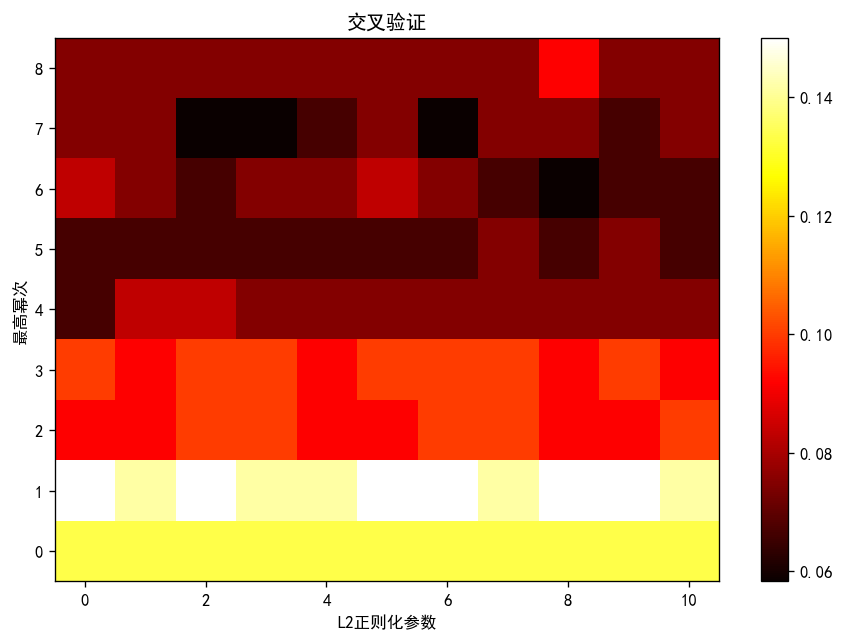

分类误差最低:
lambda = 1.0
n = 7
Res = 0.058333333333333334


In [76]:
from joblib import Parallel, delayed

la = [0,0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 1, 10, 100]
n = np.arange(1, 10, 1)
LA, N = np.meshgrid(la, n)
Z = N * 1.0

def calculate_cross(x, y, n_val, la_val):
    return Cross(x, y, int(n_val), la_val)

def run_cross_validation(m):
    results = []
    for i in range(len(la)):
        result = calculate_cross(X, Y, n[m], la[i])
        results.append(result)
    return results

# Run the nested loops in parallel
Z = Parallel(n_jobs=-1)(delayed(run_cross_validation)(m) for m in tqdm(range(len(N))))

# Convert the results to a numpy array
Z = np.array(Z)

# 绘制热图
plt.subplots(figsize=(9, 6), dpi=120)
plt.imshow(Z, cmap='hot', origin='lower')
plt.colorbar()
plt.xlabel('L2正则化参数')
plt.ylabel('最高幂次')
plt.title('交叉验证')
plt.show()

# 找到函数值最低的变量
min_index = np.unravel_index(np.argmin(Z), Z.shape)
min_LA = LA[min_index]
min_N = N[min_index]
min_value = Z[min_index]

print("分类误差最低:")
print("lambda =", min_LA)
print("n =", min_N)
print("Res =", min_value)

 <div class="alert alert-success">当前训练集下最高次幂为4-7次可能分类误差最低</div>

100%|██████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3983.19it/s]


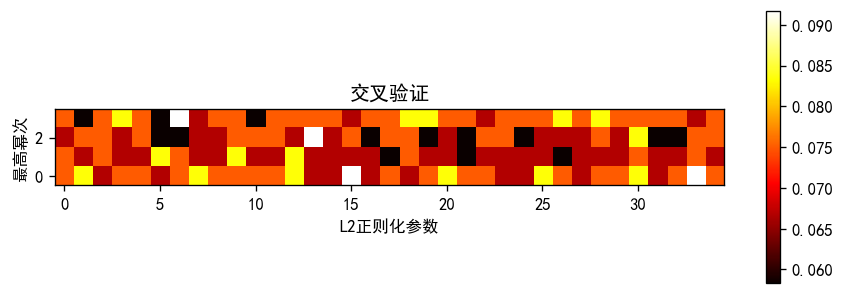

分类误差最低:
lambda = 0.04
n = 6
Res = 0.058333333333333334


In [78]:
from joblib import Parallel, delayed

la = [i**m for i in [1,2,5,7,9] for m in [-5,-4,-3,-2,-1,1,2] ]
n = np.arange(5,9)
LA, N = np.meshgrid(la, n)
Z = N * 1.0
Z[0, 0] = 1

def calculate_cross(x, y, n_val, la_val):
    return Cross(x, y, int(n_val), la_val)

def run_cross_validation(m):
    results = []
    for i in range(len(la)):
        result = calculate_cross(X, Y, n[m], la[i])
        results.append(result)
    return results

Z = Parallel(n_jobs=-1)(delayed(run_cross_validation)(m) for m in tqdm(range(len(N))))

Z = np.array(Z)

# 绘制热图
plt.subplots(figsize=(9, 3), dpi=120)
plt.imshow(Z, cmap='hot', origin='lower')
plt.colorbar()
plt.xlabel('L2正则化参数')
plt.ylabel('最高幂次')
plt.title('交叉验证')
plt.show()

# 找到函数值最低的变量
min_index = np.unravel_index(np.argmin(Z), Z.shape)
min_LA = LA[min_index]
min_N = N[min_index]
min_value = Z[min_index]

print("分类误差最低:")
print("lambda =", min_LA)
print("n =", min_N)
print("Res =", min_value)

 <div class="alert alert-success">当前训练集下最高次幂为6次，L2正则化系数为.04，分类误差最低，5%</div>

### 决策边界

In [7]:
def find_decision_boundary_point(x, y, The):
    middle = np.array([[x, y]]).reshape(1, 2)
    poly = PolynomialFeatures(degree=6, include_bias=False)
    M_poly = poly.fit_transform(middle)
    M_poly = np.insert(M_poly, 0, values=1, axis=1)
    if abs(h_theta(M_poly, The) - 0.5) <= 0.01:
        return x, y
    else:
        return None

X_s = []
Y_s = []

x_values = np.linspace(-1.5, 2.6, 1000)
y_values = np.linspace(-1, 1.5, 1000)

The = Cross_(X, Y, 6, 0.04)

results = Parallel(n_jobs=-1)(delayed(find_decision_boundary_point)(x, y, The) for x in tqdm(x_values) for y in y_values)

for result in results:
    if result is not None:
        X_s.append(result[0])
        Y_s.append(result[1])

fig, ax = plt.subplots(figsize=(8, 6), dpi=120)
sns.scatterplot(x=X_Train[:, 1].reshape(-1), y=X_Train[:, 2].reshape(-1), hue=y_Train.reshape(-1), ax=ax, marker='o', s=50, alpha=0.8, edgecolor='black', linewidth=0.5, palette='Set1')
sns.scatterplot(x=X_Test[:, 1].reshape(-1), y=X_Test[:, 2].reshape(-1), hue=y_Test.reshape(-1), ax=ax, marker='x', s=90, palette='Set2')

ax.set_title("决策边界")
sns.scatterplot(X_s,Y_s,marker="o",facecolors='black',s=30)
print()

NameError: name 'Cross_' is not defined